# **Team Members: Pau Khai, Shreyas Chaudhary, Vikram Ramesh**

# Titanic Survival Predictions

### Procedure we have followed:
1. Importing Necessary Libraries
2. Read In and Explore the Data
3. Understanding Data
4. Cleaning Data
5. Choosing the Best Model
6. Creating Submission File to submit on Kaggle

### 1) Import Libraries

In [59]:
import numpy as np
import pandas as pd
import missingno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

### 2) Get Data

In [60]:
!git clone https://github.com/khaino/cs4650.git

fatal: destination path 'cs4650' already exists and is not an empty directory.


In [61]:
PATH = '/content/cs4650/titanic/data/'
train = pd.read_csv(PATH + "train.csv")
test = pd.read_csv(PATH + "test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3) Understanding the Data
We're going to consider the features in the dataset and check how complete they are.

In [62]:
# print all columns (features)
print(train.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [63]:
train.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S


**Feature Types**
1. Numeric: Age, Fare, SibSp, Parch
2. Category: Survived, Sex, Embarked, Pclass
3. Alphanumeric: Ticket, Cabin

In [64]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Now that we know what types of features we're dealing with, we can assess how much information we have about each one.

In [65]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Some key observations we found:**
1. There are a total of 891 passengers in our training set.
2. The Age feature is missing approximately 19.8% of its values. Since the Age feature is pretty important to survival, so we should try to fill these gaps.
3. The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We drop these values from our dataset.
4. The Embarked feature is missing 0.22% of its values, which should be fine.

#### Columns with Missing Values

In [66]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [67]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

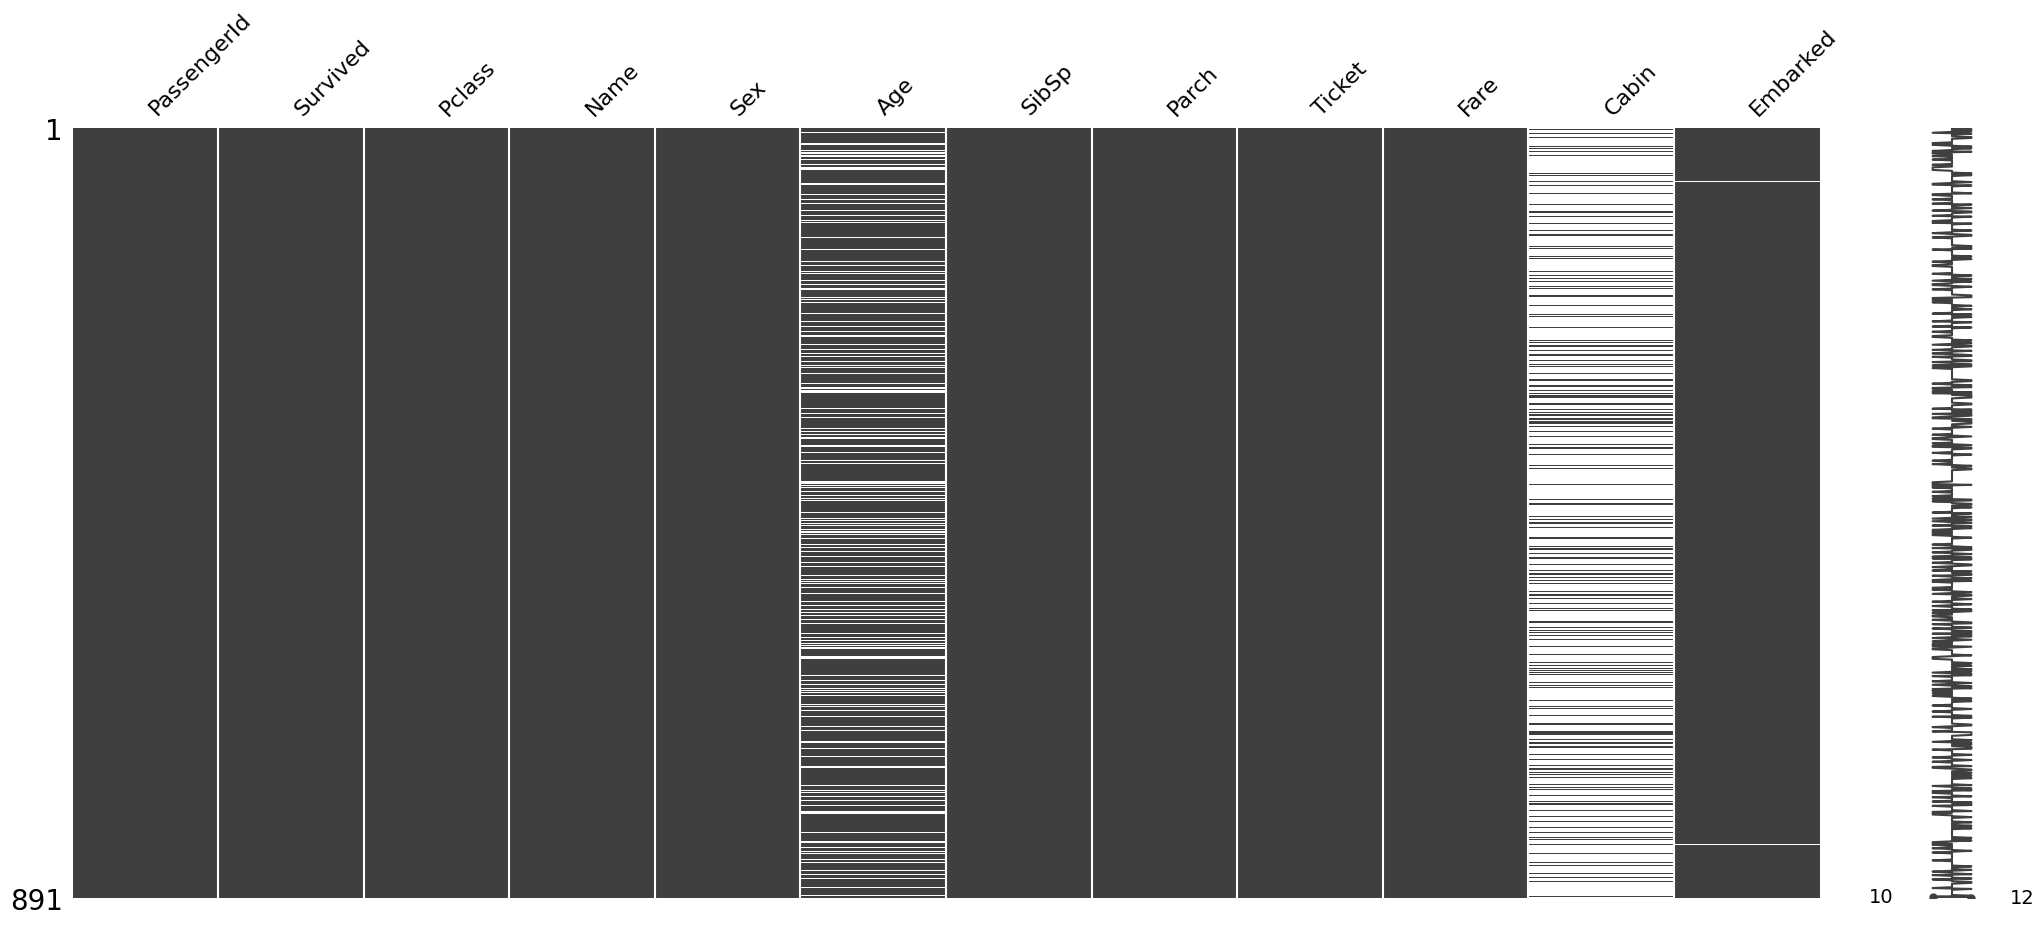

In [68]:
missingno.matrix(train)

<Axes: >

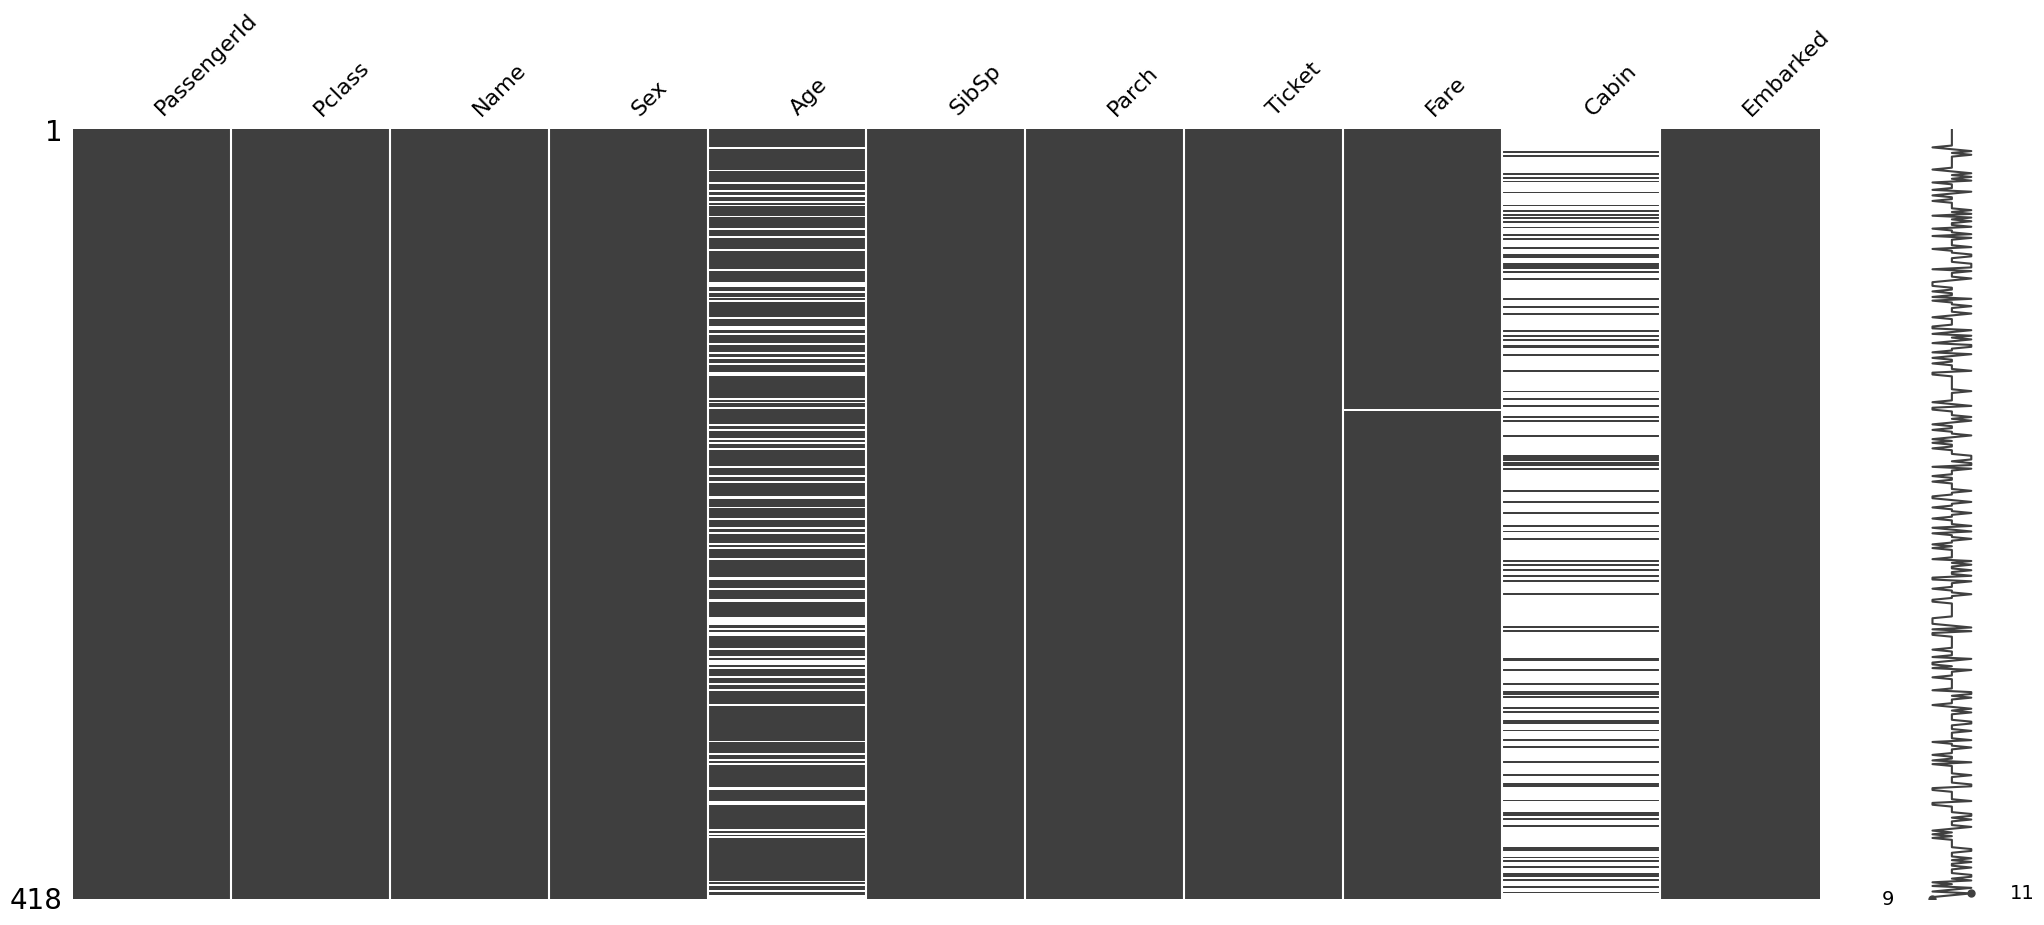

In [69]:
missingno.matrix(test)

#### Gender Feature

In [70]:
train['Sex'].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

In [71]:
def survival_rate_by_gender(df, gender):
  people = df.loc[df.Sex == gender]["Survived"]
  return people.sum() / len(people) * 100

survival_rate_men = survival_rate_by_gender(train, 'male')
survival_rate_women = survival_rate_by_gender(train, 'female')

print("Men passenger survival rate: ", survival_rate_men)
print("Women passenger survival rate: ", survival_rate_women)
print("Women have {} times higher chance of survival rate than men.".format(survival_rate_women / survival_rate_men))

Men passenger survival rate:  18.890814558058924
Women passenger survival rate:  74.20382165605095
Women have 3.928037164728569 times higher chance of survival rate than men.


<Axes: xlabel='Sex', ylabel='Survived'>

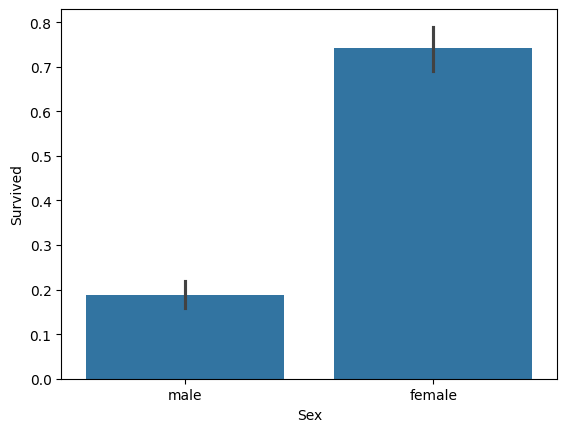

In [72]:
sns.barplot(x="Sex", y="Survived", data=train)

Females clearly have a far higher chance of surviving than men. The Sex component is critical in our predictions.

#### Pclass Feature

In [73]:
# number of passengers by pclass
train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


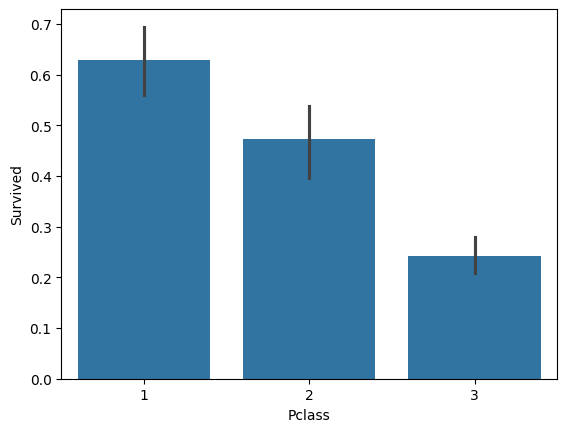

In [74]:
sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Higher socioeconomic class members had greater survival rates. Comparing 62.9%, 47.3%, and 24.2%

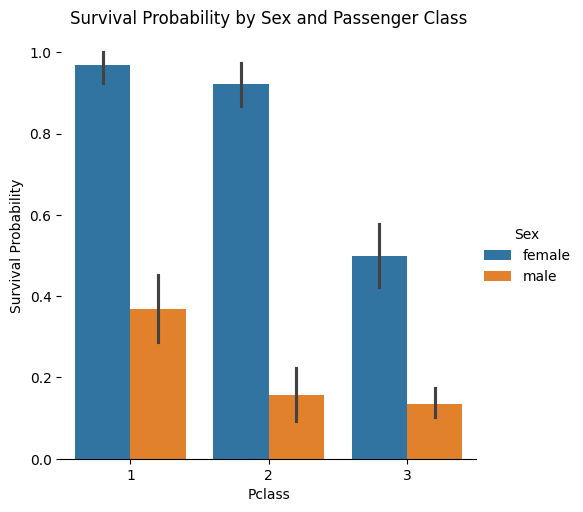

In [75]:
# Survival by gender and passenger class
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

# Show the plot
plt.show()

Survival rates were higher for females across all classes, with the highest survival rates observed among women in the 1st class. The survival rates for males were significantly lower in comparison, particularly in the lower classes.

#### SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


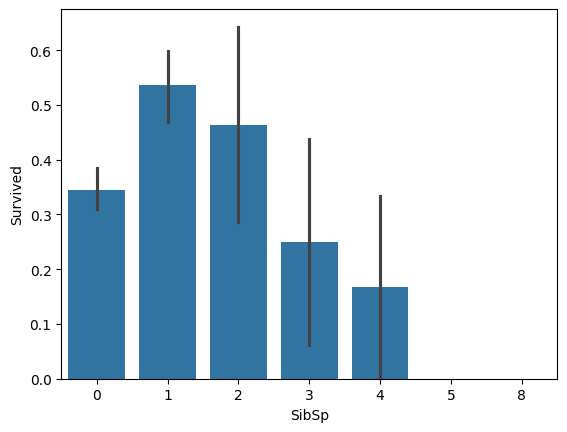

In [76]:
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Those who had more siblings or spouses on board were obviously less likely to survive overall. On contrary, those who had neither a spouse nor siblings had a worse chance of surviving than those who had. Comparing 34.5%, 53.4%, and 46.4%

#### Parch Feature

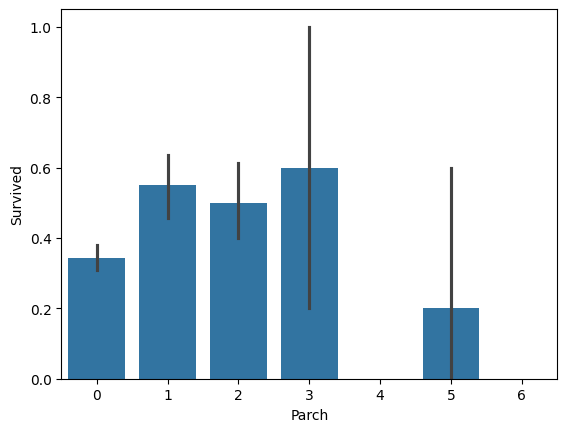

In [77]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

#### Age Feature

<Axes: ylabel='Frequency'>

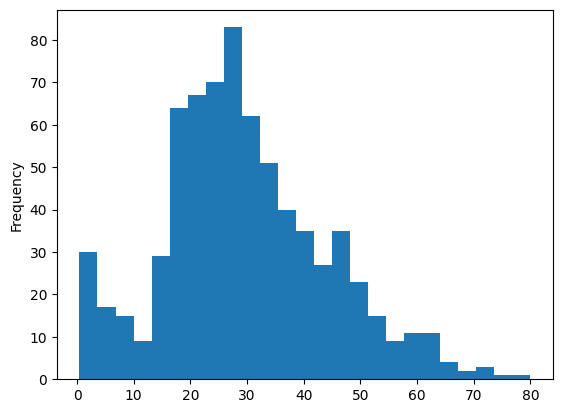

In [78]:
#showing the age wise distribution
train['Age'].plot.hist(bins=25)

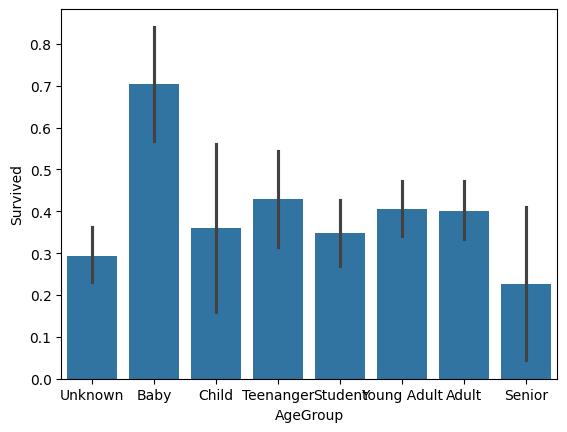

In [79]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenanger', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Babies are more likely to survive than any other age group. On the other hand, those aged 60 and above are less likely to survive.

#### Cabin Feature
We believe that passengers with recorded cabin numbers, which are most likely markers of higher socioeconomic class, have a better probability of survival.

Percentage of passenger with a cabin: 66.66666666666666
Percentage of passenger without a cabin: 29.985443959243085


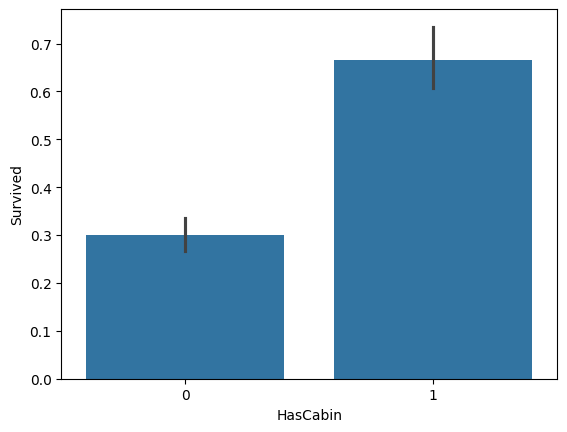

In [80]:
train["HasCabin"] = (train["Cabin"].notnull().astype('int'))
test["HasCabin"] = (test["Cabin"].notnull().astype('int'))

print("Percentage of passenger with a cabin:", train["Survived"][train["HasCabin"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of passenger without a cabin:", train["Survived"][train["HasCabin"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="HasCabin", y="Survived", data=train)
plt.show()

Passengers with a cabin are more likely to survive than those without a cabin, with a survival rate of 66.6% compared to 29.9%.

#### Embarked Feature

In [81]:
# The number of passengers by embarked port
train['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

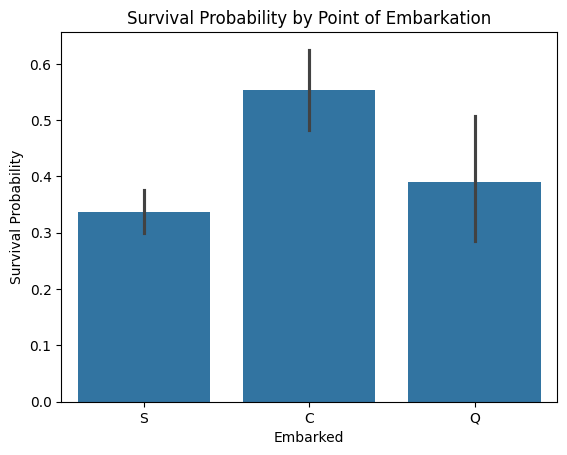

In [82]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

In [83]:
 #now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


Survival rates are highest for location C and lowest for location S. One possible explanation is that most first-class passengers, who have higher survival rates, boarded from location C, while location S had a larger proportion of third-class passengers, who tend to have lower survival rates.

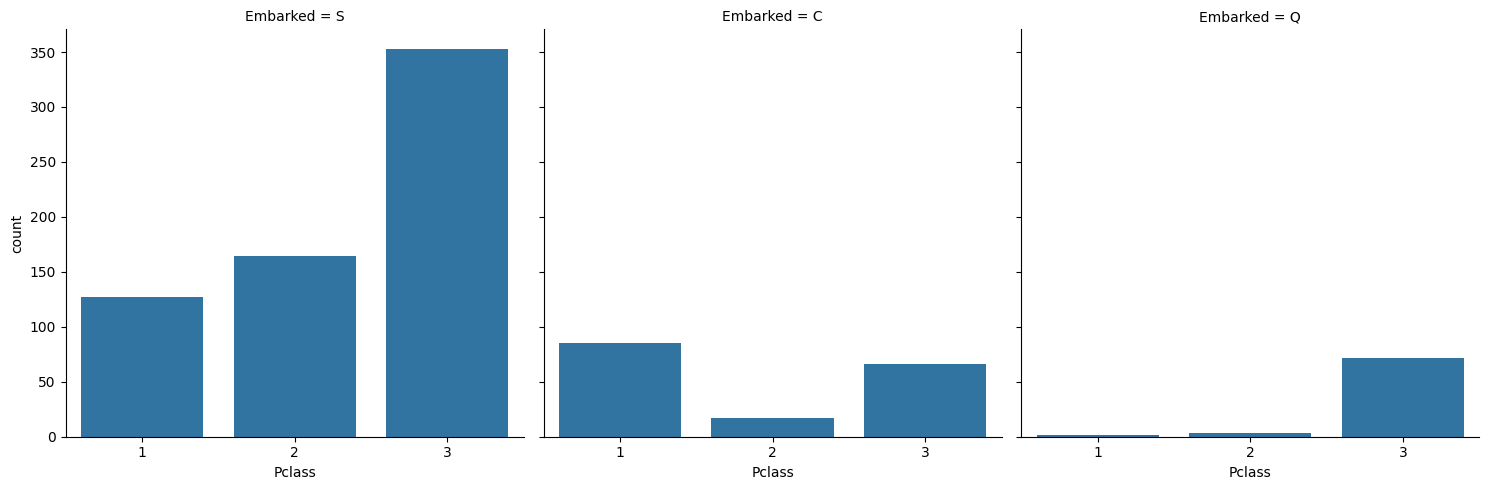

In [84]:
# Let us now test this hypothesis.
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count')

Our hypothesis seems to be correct. Location S has the highest concentration of third-class passengers, while location C has the most first-class passengers.

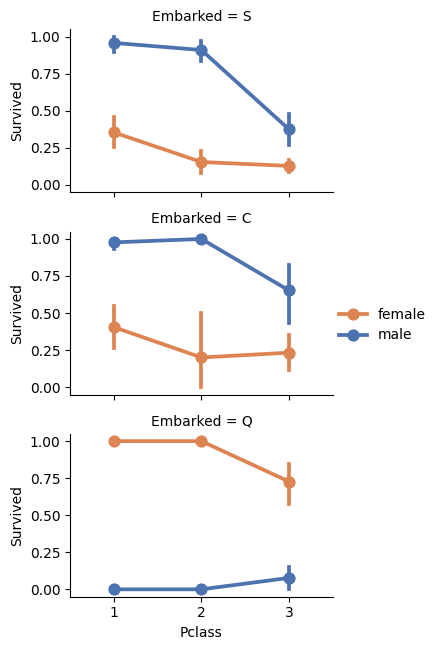

In [85]:
# Survival probability by all categorical variables
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

The graph displays survival probabilities by gender and passenger class for individuals embarking from three locations (S, C, Q) on a ship. Women generally have higher survival rates than men across all classes and embarkation points. Survival probabilities decrease as passenger class increases, from first to third class, across all embarkation points.

### 4) Cleaning Data
Time to clean our data to account for missing values and unnecessary information!

#### Fill missing values
Now, let's fill the null **Embarked** values with the most frequently embarked value.

In [86]:
mode = train['Embarked'].dropna().mode()[0]
train['Embarked'].fillna(mode, inplace = True)
test['Embarked'].fillna(mode, inplace = True)
mode

'S'

Fill the missing **Fare** value in test data with the median Fare value.

In [87]:
median = test['Fare'].dropna().median()
test['Fare'].fillna(median, inplace = True)
median

14.4542

Replacing the missing values in the **Embarked** feature with U, Unknown

In [88]:
train = train.fillna({"Embarked": "U"})

Next we'll fill in the missing values in the **Age** feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

In [89]:
# create a combined group of both datasets
combine = [train, test]

# extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [90]:
# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [91]:
# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,HasCabin,Title
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S,Baby,0,4
55,56,1,1,"Woolner, Mr. Hugh",male,-0.5,0,0,19947,35.5000,C52,S,Unknown,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Baby,1,2
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S,Adult,0,1
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,Adult,0,3
557,558,0,1,"Robbins, Mr. Victor",male,-0.5,0,0,PC 17757,227.5250,NaN,C,Unknown,0,1
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S,Student,0,1
65,66,1,3,"Moubarek, Master. Gerios",male,-0.5,1,1,2661,15.2458,NaN,C,Unknown,0,4
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S,Student,0,1
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,Young Adult,0,2


Next, we'll try to predict the missing Age values from the most common age for their Title.

In [92]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}


for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,HasCabin,Title
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,-0.5,0,0,W./C. 6609,7.5500,NaN,S,Student,0,2
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Young Adult,0,1
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S,Baby,0,2
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,Child,0,2
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,Teenanger,1,2
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,Adult,0,3
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S,Young Adult,1,1
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S,Teenanger,0,2
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,Student,0,2
181,182,0,2,"Pernot, Mr. Rene",male,-0.5,0,0,SC/PARIS 2131,15.0500,NaN,C,Young Adult,0,1


It's time separate the **fare** values into some **logical groups** as well as filling in the single missing value in the test dataset.

In [93]:
# fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

# map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#### Droping Not Useful Features

As we already have FairBand, we are dropping **Fare**.

In [94]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

We are dropping the **name** feature since it contains no more useful information.

In [95]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

We already group passengers into those who have a cabin and those who do not, therefore we are dropping **Cabin**.

In [96]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

The **ticket** does not contain any useful information for training the model.

In [97]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

We have AgeGroup, therefore we are dropping **Age** feature.

In [98]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [99]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,HasCabin,Title,FareBand
306,307,1,1,female,0,0,C,Student,0,2,4
759,760,1,1,female,0,0,S,Young Adult,1,5,4
27,28,0,1,male,3,2,S,Student,1,1,4
807,808,0,3,female,0,0,S,Teenanger,0,2,1
47,48,1,3,female,0,0,Q,Student,0,2,1
370,371,1,1,male,1,0,C,Young Adult,1,1,4
205,206,0,3,female,0,1,S,Baby,1,2,2
880,881,1,2,female,0,1,S,Young Adult,0,3,3
703,704,0,3,male,0,0,Q,Young Adult,0,1,1
474,475,0,3,female,0,0,S,Student,0,2,2


### 5) Choosing the Best Model

#### Split Data

In [100]:
target = train["Survived"]
predictors = train.drop(['Survived', 'PassengerId'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.20, random_state=0)

categorical_cols = [cname for cname in x_train.columns if x_train[cname].nunique() < 10 and x_train[cname].dtype in ['object', 'category']]
numerical_cols = [cname for cname in x_train.columns if x_train[cname].dtype in ['int64', 'float64']]

print('categorical_cols: ', categorical_cols)
print('numerical_cols: ', numerical_cols)

my_cols = categorical_cols + numerical_cols

categorical_cols:  ['Sex', 'Embarked', 'AgeGroup', 'FareBand']
numerical_cols:  ['Pclass', 'SibSp', 'Parch', 'HasCabin', 'Title']


#### Prepare Pipeline

In [101]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')
ordinal_encoder = OrdinalEncoder()
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#### Train & Test Model accuracy

In [102]:
algorithms = [
    GaussianNB,
    LogisticRegression,
    Perceptron,
    SGDClassifier,
    SVC,
    LinearSVC,
    DecisionTreeClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    KNeighborsClassifier
]

results = []
max_score = 0
best_algo = None
test_predictions = None
for algorithm in algorithms:
    model = algorithm()
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    my_pipeline.fit(x_train, y_train)
    y_pred = my_pipeline.predict(x_val)
    accuracy = round(accuracy_score(y_pred, y_val) * 100, 2)
    if max_score < accuracy:
        max_score = accuracy
        best_algo = model.__class__.__name__
        test_predictions = my_pipeline.predict(test)
    results.append((model.__class__.__name__, accuracy))

df = pd.DataFrame(results, columns =['Algorithm', 'Accuracy'])
print("{} has the highest accuracy with {}".format(best_algo, max_score))
df.sort_values(by='Accuracy', ascending=False)

RandomForestClassifier has the highest accuracy with 82.68


,Algorithm,Accuracy
7,RandomForestClassifier,82.68
8,GradientBoostingClassifier,82.68
9,KNeighborsClassifier,82.68
0,GaussianNB,79.89
6,DecisionTreeClassifier,79.89
4,SVC,79.33
1,LogisticRegression,77.65
5,LinearSVC,77.09
2,Perceptron,73.18
3,SGDClassifier,72.63


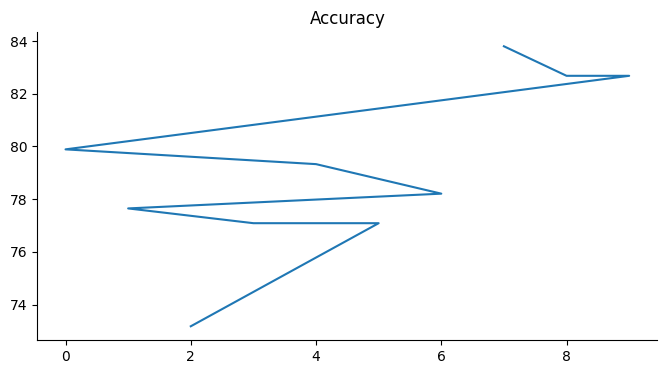

In [103]:
from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

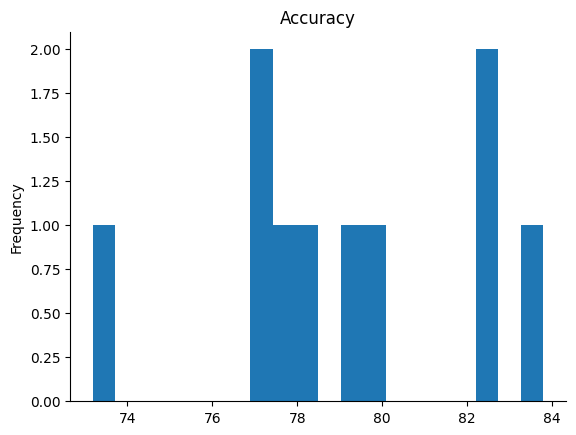

In [104]:
from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

K-Fold Cross Validation estimates machine learning model performance by splitting training data into K subsets, or folds. The provided code uses 10 folds (K = 10), where the random forest model is trained and evaluated 10 times, using one fold for testing and the others for training each time.

This method ensures each fold is used as a test set once, resulting in an array of 10 accuracy scores. These scores are then analyzed, calculating their mean and standard deviation to summarize the model's performance and consistency.

In [105]:
# Train model
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', rf)])
pipeline.fit(x_train, y_train)

# Compute cross-validation scores
scores = cross_val_score(pipeline, x_train, y_train, cv=10, scoring="accuracy")

# Print results
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81944444 0.73611111 0.84507042 0.83098592 0.78873239 0.77464789
 0.8028169  0.81690141 0.8028169  0.8028169 ]
Mean: 0.8020344287949921
Standard Deviation: 0.02913607462672491


In [106]:
test.describe(include="all")

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,HasCabin,Title,FareBand
count,418.000000,418.000000,418,418.000000,418.000000,418,418,418.000000,418.000000,418.0
unique,NaN,NaN,2,NaN,NaN,3,7,NaN,NaN,4.0
top,NaN,NaN,male,NaN,NaN,S,Young Adult,NaN,NaN,1.0
freq,NaN,NaN,266,NaN,NaN,270,153,NaN,NaN,114.0
mean,1100.500000,2.265550,NaN,0.447368,0.392344,NaN,NaN,0.217703,1.755981,NaN
std,120.810458,0.841838,NaN,0.896760,0.981429,NaN,NaN,0.413179,1.058380,NaN
min,892.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN,NaN,0.000000,2.000000,NaN


In [107]:
# Missing values in training set

train.isnull().sum().sort_values(ascending = False)

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
HasCabin       0
Title          0
FareBand       0
dtype: int64

In [108]:
# Combining training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,HasCabin,Title,FareBand
0,1,0.0,3,male,1,0,S,Student,0,1,1
1,2,1.0,1,female,1,0,C,Adult,1,3,4
2,3,1.0,3,female,0,0,S,Young Adult,0,2,2
3,4,1.0,1,female,1,0,S,Young Adult,1,3,4
4,5,0.0,3,male,0,0,S,Young Adult,0,1,2


In [109]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         0
AgeGroup         0
HasCabin         0
Title            0
FareBand         0
dtype: int64

In [110]:
feature_importances = pd.DataFrame({
    'feature': my_cols,
    'importance': np.round(rf.feature_importances_, 3)
}).sort_values('importance', ascending=False).set_index('feature')

print(feature_importances.head(15))

          importance
feature             
Pclass         0.256
SibSp          0.170
HasCabin       0.116
Sex            0.106
Title          0.101
Embarked       0.085
AgeGroup       0.058
Parch          0.056
FareBand       0.052


<Axes: xlabel='feature'>

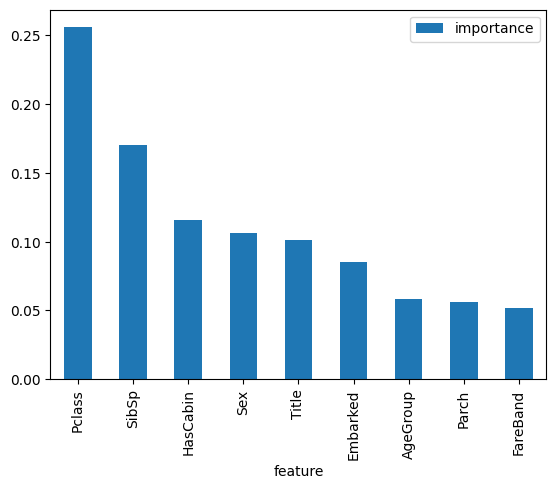

In [111]:
feature_importances.plot.bar()

From the above, we can see the importance of each feature for predictions.

FareBand and Parch play a least significant role in our random forest classifiers prediction process. Because of that we drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But we think it’s just fine to remove only FareBand and Parch

### 6) Creating Submission File
It's time to create a submission.csv file to upload to the Kaggle competition!

In [112]:
# Now you can create your submission file
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": test_predictions
})
submission.to_csv('submission.csv', index=False)

In [113]:
print(submission.head(10))  # Check the first few rows

submission.to_csv('submission.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0


In [114]:
print(submission.shape)  # Should be (418, 2)

(418, 2)
